# **CNN IMAGES CLASSIFICATION**

*Angélica María Gómez Buitrago*

*Juan Camilo Castillo Castro*

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
!pip install livelossplot # Instalar nuevos paquetes

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
print('Files in Drive:')
!ls drive/ProyectoDL/

Files in Drive:
data  images  images_resize_gray


In [0]:
!pip install tqdm
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline

# Read Data

In [7]:
from google.colab import files
uploaded = files.upload()

Saving dataTesting.csv to dataTesting.csv
Saving dataTraining.csv to dataTraining.csv


In [8]:
print (uploaded['dataTraining.csv'][:200].decode('utf-8') + '...')

,year,title,plot,genres,rating
3107,2003,Most,"most is the story of a single father who takes his eight year - old son to work with him at the railroad drawbridge where he is the bridge tender .  a da...


In [9]:
import pandas as pd 
import io
dataTraining = pd.read_csv(io.StringIO(uploaded['dataTraining.csv'].decode('utf-8'))) 
dataTraining.head()

,Unnamed: 0,year,title,plot,genres,rating
0,3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
1,900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
2,6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
3,4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
4,2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [10]:
dataTesting = pd.read_csv(io.StringIO(uploaded['dataTesting.csv'].decode('utf-8'))) 
dataTesting.head()

,Unnamed: 0,year,title,plot
0,1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
1,4,1978,Midnight Express,"the true story of billy hayes , an american c..."
2,5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
3,6,1950,Crisis,husband and wife americans dr . eugene and mr...
4,7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [0]:
!pip install imageio
!pip install imread
from matplotlib.pyplot import imread
import imageio 
import scipy.misc

# Read Images

In [0]:
image = imageio.imread(os.path.join('./drive/ProyectoDL/images_resize_gray/', str(dataTraining.index[0]) + '_resize_gray.jpeg'))

In [14]:
image

Image([[221, 221, 221, ..., 231, 231, 231],
       [218, 218, 218, ..., 227, 227, 228],
       [221, 222, 222, ..., 232, 232, 232],
       ...,
       [ 49,  47,  60, ...,  56,  69,  75],
       [ 74,  35,  44, ...,  37,  23,  64],
       [ 70,  43,  49, ...,  28,  53,  34]], dtype=uint8)

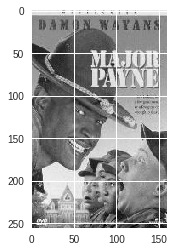

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')
plt.show()

In [17]:
images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(imageio.imread(os.path.join('./drive/ProyectoDL/images_resize_gray/', str(i) + '_resize_gray.jpeg')))

100%|██████████| 7895/7895 [44:41<00:00,  2.94it/s]


In [0]:
images_training

In [19]:
images_training = np.stack(images_training)
images_training.shape, dataTraining.shape[0]

((7895, 256, 160), 7895)

In [0]:
images_training 

In [16]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(imageio.imread(os.path.join('./drive/ProyectoDL/images_resize_gray/', str(i) + '_resize_gray.jpeg')))

images_testing = np.stack(images_testing)

images_testing.shape, dataTesting.shape[0]

100%|██████████| 3383/3383 [34:51<00:00,  1.62it/s]


((3383, 256, 160), 3383)

# Create y

In [0]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [0]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training, y_genres, test_size=0.33, random_state=42)

# Apply models to test

# RED NEURONAL

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [0]:
img_width, img_height = 160, 256

In [25]:
X_train = X_train.reshape(X_train.shape[0], 256, 160, 1)
X_test = X_test.reshape(X_test.shape[0], 256, 160, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(5289, 256, 160, 1)

In [40]:
X_test_k = images_testing.reshape(images_testing.shape[0], 256, 160, 1)
X_test_k = X_test_k.astype('float32')
X_test_k/=255
X_test_k.shape

(3383, 256, 160, 1)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(256,160,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='sigmoid'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 158, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 156, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 78, 32)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 78, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 76, 64)       18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 74, 64)       36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 37, 64)        0         
__________

In [0]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()



In [0]:
train_generator = gen.flow(X_train, y_train_genres, batch_size=64)

test_generator = test_gen.flow(X_test, y_test_genres, batch_size=64)


In [33]:
model.fit_generator(train_generator, steps_per_epoch=6000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
93/93 [==============================] - 59s 629ms/step - loss: 7.8826 - acc: 0.2138 - val_loss: 7.5509 - val_acc: 0.1923
Epoch 2/5
93/93 [==============================] - 56s 602ms/step - loss: 7.6131 - acc: 0.2224 - val_loss: 7.5501 - val_acc: 0.1935
Epoch 3/5
93/93 [==============================] - 56s 603ms/step - loss: 7.5312 - acc: 0.2117 - val_loss: 7.5640 - val_acc: 0.1921
Epoch 4/5
77/93 [=======================>......] - ETA: 6s - loss: 7.5508 - acc: 0.1913

93/93 [==============================] - 56s 605ms/step - loss: 7.5134 - acc: 0.1945 - val_loss: 7.5240 - val_acc: 0.1931
Epoch 5/5
93/93 [==============================] - 56s 606ms/step - loss: 7.4981 - acc: 0.1974 - val_loss: 7.5212 - val_acc: 0.1925


In [0]:
y_pred_cnn = model.predict_proba(X_test)

In [35]:
roc_auc_score(y_test_genres, y_pred_cnn, average='macro')

0.49899397414360563

In [0]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = model.predict_proba(X_test_k)

DF=pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)#.to_csv('pred_genres_colab.csv', index_label='ID')

In [47]:
DF

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
0,0.436298,0.356826,0.108151,0.153827,0.982831,0.487774,0.170867,0.998298,0.242931,0.269551,...,0.103668,0.276967,0.003299,0.587040,0.266580,0.050263,0.113067,0.676900,0.158261,0.104694
1,0.436307,0.356848,0.108176,0.153853,0.982822,0.487778,0.170898,0.998296,0.242963,0.269574,...,0.103694,0.276989,0.003301,0.587027,0.266609,0.050281,0.113091,0.676874,0.158287,0.104720
2,0.436044,0.356260,0.107417,0.153040,0.983075,0.487691,0.170047,0.998337,0.242175,0.268893,...,0.102963,0.276273,0.003231,0.587360,0.265871,0.049761,0.112340,0.677409,0.157450,0.103980
3,0.436094,0.356340,0.107537,0.153169,0.983036,0.487722,0.170192,0.998330,0.242323,0.268988,...,0.103079,0.276400,0.003243,0.587282,0.266020,0.049848,0.112456,0.677336,0.157600,0.104097
4,0.436184,0.356647,0.107872,0.153523,0.982926,0.487719,0.170547,0.998313,0.242630,0.269296,...,0.103381,0.276693,0.003272,0.587134,0.266301,0.050069,0.112781,0.677119,0.157944,0.104405
5,0.436101,0.356486,0.107678,0.153314,0.982989,0.487699,0.170378,0.998322,0.242481,0.269155,...,0.103215,0.276514,0.003255,0.587225,0.266149,0.049946,0.112590,0.677232,0.157767,0.104235
6,0.435942,0.356155,0.107214,0.152819,0.983145,0.487655,0.169865,0.998347,0.241991,0.268682,...,0.102774,0.276057,0.003213,0.587380,0.265735,0.049627,0.112107,0.677569,0.157261,0.103777
7,0.436196,0.356630,0.107894,0.153558,0.982914,0.487746,0.170596,0.998311,0.242687,0.269322,...,0.103432,0.276716,0.003275,0.587143,0.266351,0.050092,0.112811,0.677069,0.157982,0.104449
8,0.436282,0.356795,0.108106,0.153776,0.982846,0.487764,0.170813,0.998300,0.242881,0.269505,...,0.103623,0.276921,0.003295,0.587057,0.266536,0.050232,0.113020,0.676933,0.158205,0.104649
9,0.436144,0.356554,0.107795,0.153426,0.982949,0.487730,0.170481,0.998317,0.242583,0.269246,...,0.103325,0.276627,0.003266,0.587184,0.266239,0.050022,0.112699,0.677144,0.157873,0.104339


In [0]:
from google.colab import files

DF.to_csv('pred_colab.csv')
files.download('pred_colab.csv')